Prob <class 'pandas.core.series.Series'>
ground truth <class 'pandas.core.series.Series'>


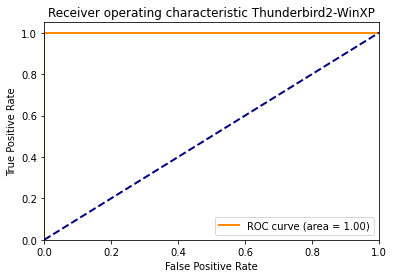

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np


input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
csv = pd.read_csv(input_csv)
csv
Prob = csv.iloc[:,-1]
app_name_str = input_csv.split("/")[-1].split("-")[0]
ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
ground_truth = ground_truth_bool.astype(int)
app_name_disk = input_csv.split("/")[-1].split(".")[0]
fpr = dict()
tpr = dict()
roc_auc = dict()
print("Prob", type(Prob))
print("ground truth",  type(ground_truth))
fpr, tpr, _  = roc_curve(ground_truth,Prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic "+app_name_disk)
plt.legend(loc="lower right")
plt.show()

/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_gt = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  olu_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1214/620517288.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fut

jones_gt 0     0
1     0
2     0
3     0
4     0
     ..
11    0
12    0
13    0
14    0
15    1
Length: 64, dtype: int64 jones_prob 0     0.44
1     0.01
2     0.12
3     0.16
4     0.77
      ... 
11    0.65
12    0.28
13    0.61
14    0.00
15    0.45
Length: 64, dtype: float64
olu_gt 0     0
1     0
2     0
3     0
4     0
     ..
11    1
12    1
13    0
14    0
15    0
Length: 80, dtype: int64 olu_prob 0     0.043552
1     0.000975
2     0.012071
3     0.015988
4     0.962853
        ...   
11    1.058303
12    0.972519
13    0.042974
14    0.019214
15    0.003250
Length: 80, dtype: float64


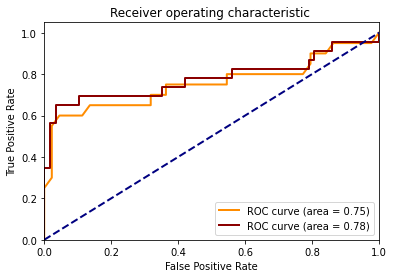

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np
#!/usr/bin/env python
import os, re
dirlist = os.listdir('.')
jones_pattern = '^jones.*$'
olu_pattern = '^olu.*$'

dir_path = "/Users/seunfuta/Downloads/ROC/"
files = os.listdir(dir_path)
jones_files = []
olu_files = []

for fname in files:
  if re.search(jones_pattern, fname):
    jones_files.append(fname)

for fname in files:
  if re.search(olu_pattern, fname):
    olu_files.append(fname)
jones_prob = pd.Series()
jones_gt = pd.Series()
olu_prob = pd.Series()
olu_gt = pd.Series()

for eachfile in jones_files:
  jones_df = pd.read_csv(dir_path+eachfile)
  jones_prob = jones_prob.append(jones_df.iloc[:,1])
  jones_gt = jones_gt.append(jones_df.iloc[:,-1])

for eachfile in olu_files:
  olu_df = pd.read_csv(dir_path+eachfile)
  olu_prob = olu_prob.append(olu_df.iloc[:,1])
  olu_gt = olu_gt.append(olu_df.iloc[:,-1])


#input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
#csv = pd.read_csv(input_csv)

#csv
#Prob = csv.iloc[:,-1]
#app_name_str = input_csv.split("/")[-1].split("-")[0]
#ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
#ground_truth = ground_truth_bool.astype(int)
#app_name_disk = input_csv.split("/")[-1].split(".")[0]
#Jones
fpr_jones = dict()
tpr_jones = dict()
roc_auc_jones = dict()
print("jones_gt", jones_gt, "jones_prob", jones_prob)
fpr_jones, tpr_jones, _jones  = roc_curve(jones_gt,jones_prob)
roc_auc_jones = auc(fpr_jones, tpr_jones)
#Olu
fpr_olu = dict()
tpr_olu = dict()
roc_auc_olu = dict()
print("olu_gt", olu_gt, "olu_prob", olu_prob)
fpr_olu, tpr_olu, _olu  = roc_curve(olu_gt,olu_prob)
roc_auc_olu = auc(fpr_olu, tpr_olu)
plt.figure()
lw = 2
plt.plot(fpr_jones,tpr_jones,color="darkorange",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_jones,)
plt.plot(fpr_olu,tpr_olu,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_olu,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1116/1217430044.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1116/1217430044.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jones_gt = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1116/1217430044.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  olu_prob = pd.Series()
/var/folders/s7/d__51l693s13d_yt81j0qp9r0000gn/T/ipykernel_1116/1217430044.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

jones_gt
0     0
1     0
2     0
3     0
4     0
     ..
24    0
25    0
26    0
27    0
28    0
Length: 841, dtype: int16
jones_prob
0     0.12
1     0.11
2     0.10
3     0.09
4     0.08
      ... 
24    0.04
25    0.03
26    0.03
27    0.03
28    0.03
Length: 841, dtype: float64
olu_gt
0     0
1     0
2     0
3     0
4     0
     ..
24    0
25    0
26    0
27    0
28    0
Length: 841, dtype: int16
olu_prob
0     0.03
1     0.03
2     0.02
3     0.02
4     0.01
      ... 
24    0.04
25    0.03
26    0.03
27    0.03
28    0.03
Length: 841, dtype: float64


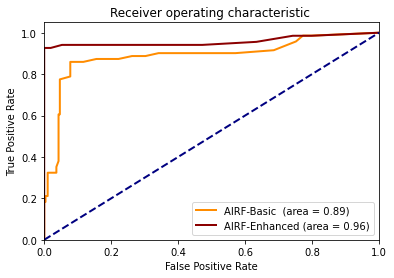

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np
#!/usr/bin/env python
import os, re
dirlist = os.listdir('.')
jones_pattern = '^jones.*$'
olu_pattern = '^olu.*$'

jones_path = "/Users/seunfuta/Downloads/NIST/JONESSCAN/"
olu_path = "/Users/seunfuta/Downloads/NIST/OLUSCAN/FAKE/"
jones_files = os.listdir(jones_path)
olu_files = os.listdir(olu_path)
jones_files_list = []
olu_files_list = []

for fname in jones_files:
  if re.search(jones_pattern, fname):
    jones_files_list.append(fname)

for fname in olu_files:
  if re.search(olu_pattern, fname):
    olu_files_list.append(fname)
jones_prob = pd.Series()
jones_gt = pd.Series()
olu_prob = pd.Series()
olu_gt = pd.Series()
#print("jones_Path", jones_path)

for eachfile in jones_files:
  if not eachfile.startswith('.') and os.path.isfile(os.path.join(jones_path, eachfile)):
    #print(eachfile)
    jones_df = pd.read_csv(jones_path+eachfile, dtype={'first_column': 'str', 'second_column': 'str'})
    jones_prob = jones_prob.append(jones_df.iloc[:,-2])
    jones_gt = jones_gt.append(jones_df.iloc[:,-1])

for eachfile in olu_files:
  if not eachfile.startswith('.') and os.path.isfile(os.path.join(jones_path, eachfile)):
    #print(eachfile)
    olu_df = pd.read_csv(olu_path+eachfile)
    olu_prob = olu_prob.append(olu_df.iloc[:,-2], )
    olu_gt = olu_gt.append(olu_df.iloc[:,-1])


#input_csv = "/Users/seunfuta/Downloads/NIST/OLUSCAN/NEW/Thunderbird2-WinXP.csv"
#csv = pd.read_csv(input_csv)

#csv
#Prob = csv.iloc[:,-1]
#app_name_str = input_csv.split("/")[-1].split("-")[0]
#ground_truth_bool = csv.iloc[:,0].str.contains(app_name_str)
#ground_truth = ground_truth_bool.astype(int)
#app_name_disk = input_csv.split("/")[-1].split(".")[0]
#Jones
fpr_jones = dict()
tpr_jones = dict()
roc_auc_jones = dict()
jones_gt = jones_gt.astype('int16')
jones_prob = jones_prob.astype('float')
jones_gt = jones_gt.dropna()
jones_prob = jones_prob.dropna()
print("jones_gt")
print(jones_gt)
print("jones_prob")
print(jones_prob)

#jones_gt = jones_gt.values.astype(np.float)
#jones_prob = jones_prob.values.astype(np.float)
#print(jones_gt.isnull().values.any())
#print(jones_prob.isnull().values.any())

fpr_jones, tpr_jones, _jones  = roc_curve(jones_gt,jones_prob)
roc_auc_jones = auc(fpr_jones, tpr_jones)
#Olu
fpr_olu = dict()
tpr_olu = dict()
roc_auc_olu = dict()
olu_gt = olu_gt.astype('int16')
olu_prob = olu_prob.astype('float')
olu_gt = olu_gt.dropna()
olu_prob = olu_prob.dropna()
print("olu_gt")
print(olu_gt)
print("olu_prob")
print(olu_prob)
fpr_olu, tpr_olu, _olu  = roc_curve(olu_gt,olu_prob)
roc_auc_olu = auc(fpr_olu, tpr_olu)
plt.figure()
lw = 2
plt.plot(fpr_jones,tpr_jones,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % roc_auc_jones,)
plt.plot(fpr_olu,tpr_olu,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % roc_auc_olu,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

In [9]:
print(len(fpr_olu),len(tpr_olu))

28 28


In [13]:
print(len(olu_gt), len(olu_prob))

841 841


In [14]:
fpr_olu_2 , tpr_olu_2, _olu_ = roc_curve(olu_gt,olu_prob)

In [22]:
jones_prob

0     0.12
1     0.11
2     0.10
3     0.09
4     0.08
      ... 
24    0.04
25    0.03
26    0.03
27    0.03
28    0.03
Length: 841, dtype: float64

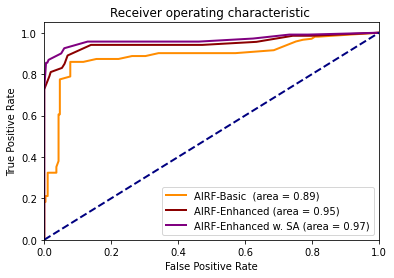

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
import pandas as pd
import numpy as np
olu_roc = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/olu_roc.csv")
olu2_roc = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/olu2_roc.csv")
jones_roc = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/jones_roc.csv")
jones_fpr = jones_roc.FPR
jones_tpr = jones_roc.TPR
olu_fpr = olu_roc.FPR
olu_tpr = olu_roc.TPR
olu2_fpr = olu2_roc.FPR
olu2_tpr = olu2_roc.TPR
jones_auc = auc(jones_fpr, jones_tpr)
olu_auc = auc(olu_fpr, olu_tpr)
olu2_auc = auc(olu_fpr, olu_tpr)
olu2_fpr = olu2_roc.FPR
olu2_tpr = olu2_roc.TPR
olu2_auc = auc(olu2_fpr, olu2_tpr)

jones_auc = auc(jones_fpr, jones_tpr)
plt.figure()
lw = 2
plt.plot(jones_fpr,jones_tpr,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % jones_auc,)
plt.plot(olu_fpr,olu_tpr,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % olu_auc,)
plt.plot(olu2_fpr,olu2_tpr,color="purple",lw=lw,label="AIRF-Enhanced w. SA (area = %0.2f)" % olu2_auc,)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()



In [42]:
m57 = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/m57.csv")
charlie_jones_prob = m57.charlie_jones
charlie_olu_prob = m57.charlie_olu
charlie_gt = m57.charlie_gt
jo_jones_prob = m57.jo_jones
jo_olu_prob = m57.jo_olu
jo_gt = m57.jo_gt
pat_jones_prob = m57.pat_jones
pat_olu_prob = m57.pat_olu
pat_gt = m57.pat_gt
terry_jones_prob = m57.terry_jones
terry_olu_prob = m57.terry_olu
terry_gt = m57.terry_gt


In [45]:
fpr_j , tpr_j, x_j = roc_curve(charlie_gt,charlie_jones_prob)
m57_jones_auc = auc(fpr_j, tpr_j)
fpr_o , tpr_o, x_o = roc_curve(charlie_gt,charlie_olu_prob)
m57_olu_auc = auc(fpr_o, tpr_o)

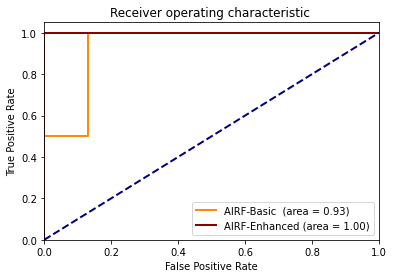

In [46]:
plt.plot(fpr_j,tpr_j,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % m57_jones_auc)
plt.plot(fpr_o,tpr_o,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % m57_olu_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

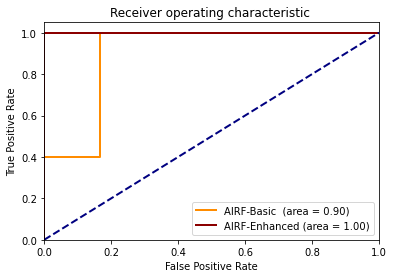

In [49]:
m57 = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/m57.csv")
charlie_jones_prob = m57.charlie_jones
charlie_olu_prob = m57.charlie_olu
charlie_gt = m57.charlie_gt
jo_jones_prob = m57.jo_jones
jo_olu_prob = m57.jo_olu
jo_gt = m57.jo_gt
pat_jones_prob = m57.pat_jones
pat_olu_prob = m57.pat_olu
pat_gt = m57.pat_gt
terry_jones_prob = m57.terry_jones
terry_olu_prob = m57.terry_olu
terry_gt = m57.terry_gt

x_gt = jo_gt
x_jones_prob = jo_jones_prob
x_olu_prob = jo_olu_prob

fpr_j , tpr_j, x_j = roc_curve(x_gt,x_jones_prob)
m57_jones_auc = auc(fpr_j, tpr_j)
fpr_o , tpr_o, x_o = roc_curve(x_gt,x_olu_prob)
m57_olu_auc = auc(fpr_o, tpr_o)

plt.plot(fpr_j,tpr_j,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % m57_jones_auc)
plt.plot(fpr_o,tpr_o,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % m57_olu_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

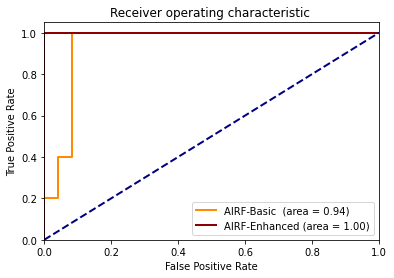

In [50]:
m57 = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/m57.csv")
charlie_jones_prob = m57.charlie_jones
charlie_olu_prob = m57.charlie_olu
charlie_gt = m57.charlie_gt
jo_jones_prob = m57.jo_jones
jo_olu_prob = m57.jo_olu
jo_gt = m57.jo_gt
pat_jones_prob = m57.pat_jones
pat_olu_prob = m57.pat_olu
pat_gt = m57.pat_gt
terry_jones_prob = m57.terry_jones
terry_olu_prob = m57.terry_olu
terry_gt = m57.terry_gt

x_gt = pat_gt
x_jones_prob = pat_jones_prob
x_olu_prob = pat_olu_prob

fpr_j , tpr_j, x_j = roc_curve(x_gt,x_jones_prob)
m57_jones_auc = auc(fpr_j, tpr_j)
fpr_o , tpr_o, x_o = roc_curve(x_gt,x_olu_prob)
m57_olu_auc = auc(fpr_o, tpr_o)

plt.plot(fpr_j,tpr_j,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % m57_jones_auc)
plt.plot(fpr_o,tpr_o,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % m57_olu_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

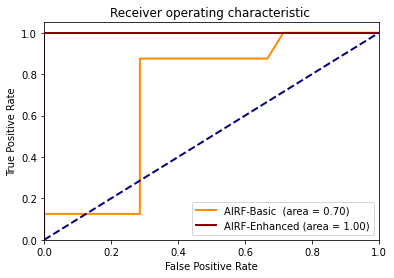

In [51]:
m57 = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/m57.csv")
charlie_jones_prob = m57.charlie_jones
charlie_olu_prob = m57.charlie_olu
charlie_gt = m57.charlie_gt
jo_jones_prob = m57.jo_jones
jo_olu_prob = m57.jo_olu
jo_gt = m57.jo_gt
pat_jones_prob = m57.pat_jones
pat_olu_prob = m57.pat_olu
pat_gt = m57.pat_gt
terry_jones_prob = m57.terry_jones
terry_olu_prob = m57.terry_olu
terry_gt = m57.terry_gt

x_gt = terry_gt
x_jones_prob = terry_jones_prob
x_olu_prob = terry_olu_prob

fpr_j , tpr_j, x_j = roc_curve(x_gt,x_jones_prob)
m57_jones_auc = auc(fpr_j, tpr_j)
fpr_o , tpr_o, x_o = roc_curve(x_gt,x_olu_prob)
m57_olu_auc = auc(fpr_o, tpr_o)

plt.plot(fpr_j,tpr_j,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % m57_jones_auc)
plt.plot(fpr_o,tpr_o,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % m57_olu_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

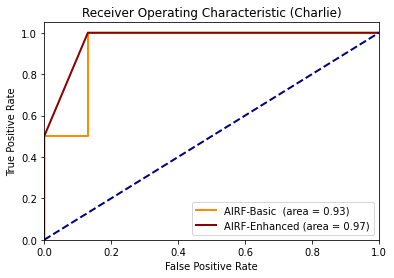

In [87]:
m57 = pd.read_csv("/Users/seunfuta/Downloads/NIST/ROC/m57b.csv")
charlie_jones_prob = m57.charlie_jones
charlie_olu_prob = m57.charlie_olu
charlie_gt = m57.charlie_gt
jo_jones_prob = m57.jo_jones
jo_olu_prob = m57.jo_olu
jo_gt = m57.jo_gt
pat_jones_prob = m57.pat_jones
pat_olu_prob = m57.pat_olu
pat_gt = m57.pat_gt
terry_jones_prob = m57.terry_jones
terry_olu_prob = m57.terry_olu
terry_gt = m57.terry_gt

x_gt = charlie_gt
x_jones_prob = charlie_jones_prob
x_olu_prob = charlie_olu_prob

fpr_j , tpr_j, x_j = roc_curve(x_gt,x_jones_prob)
m57_jones_auc = auc(fpr_j, tpr_j)
fpr_o , tpr_o, x_o = roc_curve(x_gt,x_olu_prob)
m57_olu_auc = auc(fpr_o, tpr_o)

plt.plot(fpr_j,tpr_j,color="darkorange",lw=lw,label="AIRF-Basic  (area = %0.2f)" % m57_jones_auc)
plt.plot(fpr_o,tpr_o,color="darkred",lw=lw,label="AIRF-Enhanced (area = %0.2f)" % m57_olu_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Charlie)")
plt.legend(loc="lower right")
plt.show()